In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt  # noqa

In [3]:
df = pd.read_csv("dataset/diabetes.csv")
df.columns
df.head(5)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Replace missing values with nan
cols_with_missing_values = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df.loc[:, cols_with_missing_values] = df.loc[:, cols_with_missing_values].replace(0, np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Split training and test set

In [7]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

## Impute missing values

Impute after splitting training and test set to avoid data leakage.

In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=9)
X_train = imputer.fit_transform(X_train, y_train)

## Model training

In [9]:
def get_dataframe(X, y, columns):
    return pd.DataFrame(np.c_[X, y], columns=columns)

In [10]:
from sklearn.linear_model import LogisticRegression

# from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Perform cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler


def perform_cross_validation(X, y):
    std_scaler = StandardScaler()
    X_train_scaled = std_scaler.fit_transform(X, y)
    clf = LogisticRegression(random_state=42)
    return cross_val_predict(clf, X_train_scaled, y, cv=5, n_jobs=-1)


def print_metrics(y_test, y_hat):
    print(f"Accuracy: {accuracy_score(y_test, y_hat)}")
    print(f"ROC AUC score: {roc_auc_score(y_test, y_hat)}")
    print(f"Confusion Matrix: {confusion_matrix(y_test, y_hat)}")

## No data preprocessing

In [11]:
df_train = get_dataframe(X_train, y_train, df.columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   691 non-null    float64
 2   BloodPressure             691 non-null    float64
 3   SkinThickness             691 non-null    float64
 4   Insulin                   691 non-null    float64
 5   BMI                       691 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       691 non-null    float64
 8   Outcome                   691 non-null    float64
dtypes: float64(9)
memory usage: 48.7 KB


In [12]:
df_train.corr()["Outcome"]

Pregnancies                 0.213637
Glucose                     0.500946
BloodPressure               0.159086
SkinThickness               0.282009
Insulin                     0.362527
BMI                         0.311100
DiabetesPedigreeFunction    0.169109
Age                         0.236696
Outcome                     1.000000
Name: Outcome, dtype: float64

In [13]:
y_pred = perform_cross_validation(
    df_train.drop(columns=["Outcome"]).values, df_train.loc[:, "Outcome"].values
)

print_metrics(y_train, y_pred)

Accuracy: 0.76410998552822
ROC AUC score: 0.7148224988473951
Confusion Matrix: [[395  55]
 [108 133]]


## Perform log transformation

In [14]:
df_train = get_dataframe(X_train, y_train, df.columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   691 non-null    float64
 2   BloodPressure             691 non-null    float64
 3   SkinThickness             691 non-null    float64
 4   Insulin                   691 non-null    float64
 5   BMI                       691 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       691 non-null    float64
 8   Outcome                   691 non-null    float64
dtypes: float64(9)
memory usage: 48.7 KB


In [15]:
df_train.corr()["Outcome"]

Pregnancies                 0.213637
Glucose                     0.500946
BloodPressure               0.159086
SkinThickness               0.282009
Insulin                     0.362527
BMI                         0.311100
DiabetesPedigreeFunction    0.169109
Age                         0.236696
Outcome                     1.000000
Name: Outcome, dtype: float64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

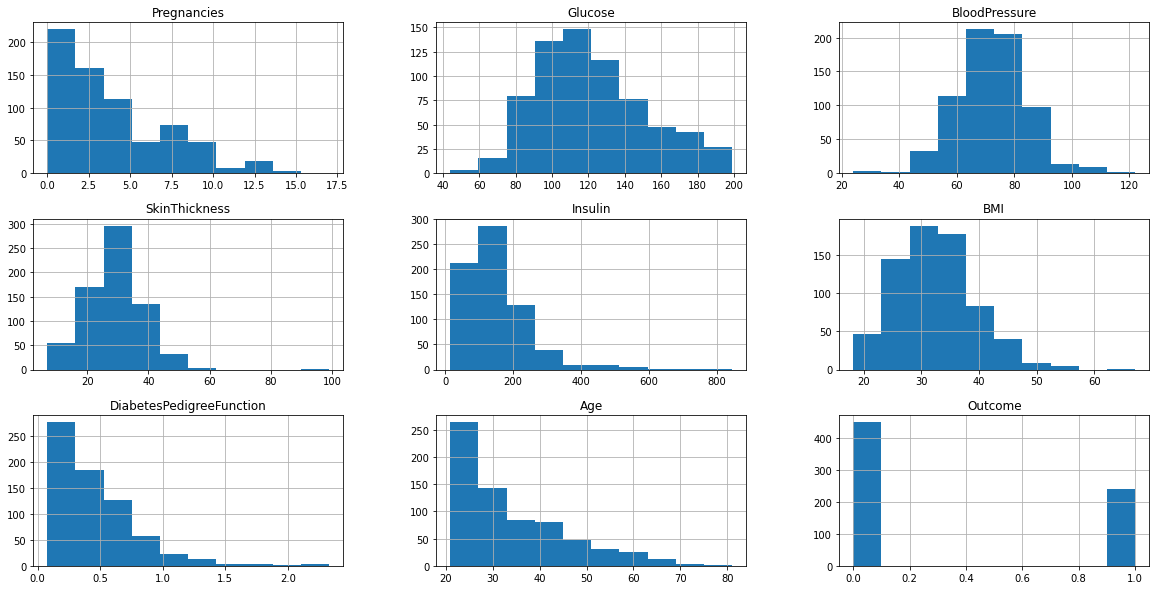

In [16]:
df_train.hist(figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

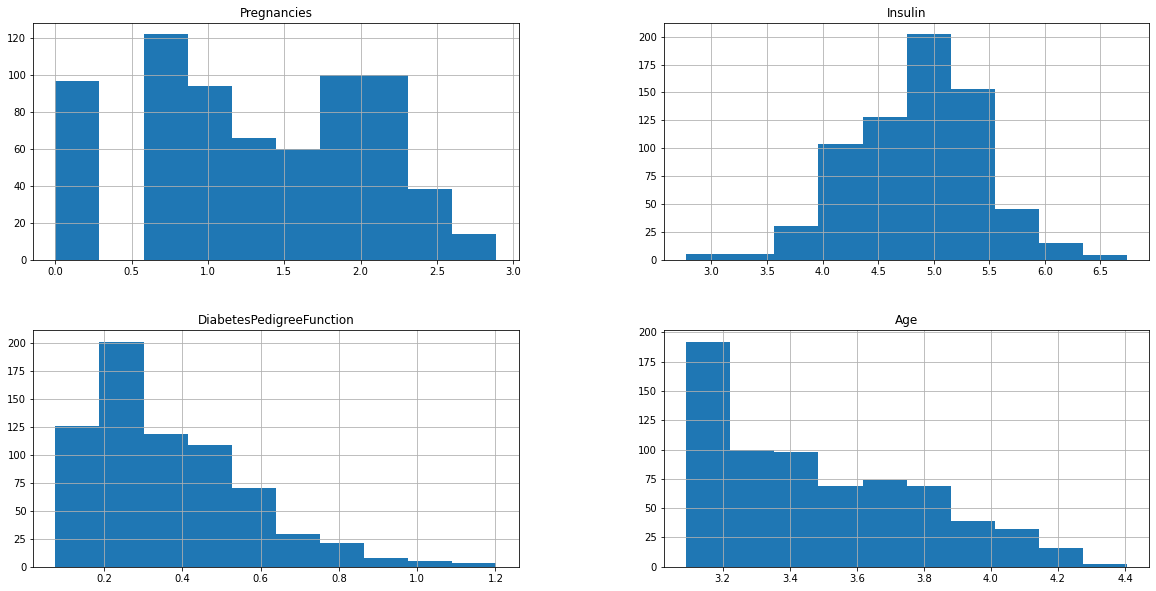

In [17]:
# lets perform log transformation on age, pregnancies, diabeticpredigreefunction, Insulin
# Glucose, bloodpressure and BMI already look like normally distributed
cols_to_normal_dist = ["Pregnancies", "Insulin", "DiabetesPedigreeFunction", "Age"]
df_train.loc[:, cols_to_normal_dist] = pd.DataFrame(
    np.log(1 + df_train.loc[:, cols_to_normal_dist].values), columns=cols_to_normal_dist
)

df_train.loc[:, cols_to_normal_dist].hist(figsize=(20, 10))

In [18]:
df_train.corr()["Outcome"]

Pregnancies                 0.169498
Glucose                     0.500946
BloodPressure               0.159086
SkinThickness               0.282009
Insulin                     0.409385
BMI                         0.311100
DiabetesPedigreeFunction    0.177285
Age                         0.269421
Outcome                     1.000000
Name: Outcome, dtype: float64

In [19]:
y_pred = perform_cross_validation(
    df_train.drop(columns=["Outcome"]).values, df_train.loc[:, "Outcome"].values
)

print_metrics(y_train, y_pred)

Accuracy: 0.768451519536903
ROC AUC score: 0.7200829875518672
Confusion Matrix: [[396  54]
 [106 135]]


Accuracy increased from 0.764 to 0.768

## BoxCox transformation

In [20]:
df_train = get_dataframe(X_train, y_train, df.columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   691 non-null    float64
 2   BloodPressure             691 non-null    float64
 3   SkinThickness             691 non-null    float64
 4   Insulin                   691 non-null    float64
 5   BMI                       691 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       691 non-null    float64
 8   Outcome                   691 non-null    float64
dtypes: float64(9)
memory usage: 48.7 KB


In [21]:
from scipy import stats as spstats

l, opt_lambda = spstats.boxcox(1 + df_train["Pregnancies"])
opt_lambda

0.1737921191814988

In [22]:
pregnancies_transformed = spstats.boxcox(1 + df_train["Pregnancies"], lmbda=opt_lambda)
df_train["Pregnancies"] = pregnancies_transformed

<AxesSubplot:ylabel='Count'>

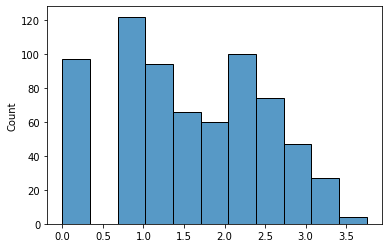

In [23]:
sns.histplot(data=pregnancies_transformed)

In [24]:
df_train.corr()["Outcome"]

Pregnancies                 0.180397
Glucose                     0.500946
BloodPressure               0.159086
SkinThickness               0.282009
Insulin                     0.362527
BMI                         0.311100
DiabetesPedigreeFunction    0.169109
Age                         0.236696
Outcome                     1.000000
Name: Outcome, dtype: float64

In [25]:
y_pred = perform_cross_validation(
    df_train.drop(columns=["Outcome"]).values, df_train.loc[:, "Outcome"].values
)

print_metrics(y_train, y_pred)

Accuracy: 0.7670043415340086
ROC AUC score: 0.7189718764407561
Confusion Matrix: [[395  55]
 [106 135]]


## Binning Glucose and BMI

In [26]:
df_train = get_dataframe(X_train, y_train, df.columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   691 non-null    float64
 2   BloodPressure             691 non-null    float64
 3   SkinThickness             691 non-null    float64
 4   Insulin                   691 non-null    float64
 5   BMI                       691 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       691 non-null    float64
 8   Outcome                   691 non-null    float64
dtypes: float64(9)
memory usage: 48.7 KB


> **Oral glucose tolerance test**-For this test, you fast overnight, and the fasting blood sugar level is measured. Then you drink a sugary liquid, and blood sugar levels are tested periodically for the next two hours.A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

In [27]:
glucose = df_train["Glucose"]
glucose.min(), glucose.max(), glucose.mean()

(44.0, 199.0, 121.59671972986013)

In [28]:
# introduce three categories normal, prediabetes and diabetes
glucose_bins = [0, 100, 140, 200]
glucose_bin_labels = ["low", "normal", "prediabetic"]
df_train["GlucoseLevel"] = pd.cut(
    df_train.loc[:, "Glucose"], bins=glucose_bins, right=False, labels=glucose_bin_labels
)
df_train.dtypes

Pregnancies                  float64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                      float64
GlucoseLevel                category
dtype: object

In [29]:
df_train.loc[:, ["Glucose", "GlucoseLevel", "Outcome"]].groupby(["GlucoseLevel", "Outcome"]).count()

Glucose
GlucoseLevel Outcome         
low          0.0          162
             1.0           13
normal       0.0          236
             1.0          107
prediabetic  0.0           52
             1.0          121

In [30]:
df_train.loc[:, ["Glucose", "Outcome"]].groupby("Outcome", as_index=False).mean()

,Outcome,Glucose
0,0.0,110.496543
1,1.0,142.323190


In [31]:
bmi_bins = [0, 19, 25, 30, df_train["BMI"].max() + 1]
bmi_bin_categories = ["underweight", "normal", "overweight", "obese"]
df_train["BMILevel"] = pd.cut(
    df_train.loc[:, "BMI"], bins=bmi_bins, right=False, labels=bmi_bin_categories
)
df_train.dtypes

Pregnancies                  float64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                      float64
GlucoseLevel                category
BMILevel                    category
dtype: object

In [32]:
df_train.loc[:, ["BMI", "BMILevel", "Outcome"]].groupby(["BMILevel", "Outcome"]).count()

BMI
BMILevel    Outcome       
underweight 0.0        3.0
            1.0        NaN
normal      0.0       82.0
            1.0        7.0
overweight  0.0      131.0
            1.0       38.0
obese       0.0      234.0
            1.0      196.0

In [33]:
df_train.corr()["Outcome"]

Pregnancies                 0.213637
Glucose                     0.500946
BloodPressure               0.159086
SkinThickness               0.282009
Insulin                     0.362527
BMI                         0.311100
DiabetesPedigreeFunction    0.169109
Age                         0.236696
Outcome                     1.000000
Name: Outcome, dtype: float64

In [34]:
# perform cross validation using logistic regression classifier
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_train.loc[:, ["GlucoseLevelEnc", "BMILevelEnc"]] = ordinal_encoder.fit_transform(
    df_train.loc[:, ["GlucoseLevel", "BMILevel"]], df_train["Outcome"]
)
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlucoseLevel,BMILevel,GlucoseLevelEnc,BMILevelEnc
0,1.0,113.0,64.0,35.000000,117.000000,33.6,0.543,21.0,1.0,normal,obese,1.0,1.0
1,1.0,88.0,30.0,42.000000,99.000000,55.0,0.496,26.0,1.0,low,obese,0.0,1.0
2,1.0,146.0,56.0,29.333333,219.111111,29.7,0.564,29.0,0.0,prediabetic,overweight,2.0,2.0
3,2.0,155.0,74.0,17.000000,96.000000,26.6,0.433,27.0,1.0,prediabetic,overweight,2.0,2.0
4,6.0,129.0,90.0,7.000000,326.000000,19.6,0.582,60.0,0.0,normal,normal,1.0,0.0


In [35]:
df_train.loc[:, ["GlucoseLevelEnc", "BMILevelEnc", "Outcome"]].corr()["Outcome"]

GlucoseLevelEnc    0.465112
BMILevelEnc        0.004986
Outcome            1.000000
Name: Outcome, dtype: float64

In [36]:
# predicting with only the ordinal encoded features
y_pred = perform_cross_validation(
    df_train.drop(columns=["Glucose", "GlucoseLevel", "BMI", "BMILevel", "Outcome"]).values,
    df_train.loc[:, "Outcome"].values,
)

print_metrics(y_train, y_pred)

Accuracy: 0.7496382054992764
ROC AUC score: 0.703711387736284
Confusion Matrix: [[385  65]
 [108 133]]


Accuracy reduced from 0.764 to 0.749

## Using feature interactions

In [37]:
df_train = get_dataframe(X_train, y_train, df.columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   691 non-null    float64
 2   BloodPressure             691 non-null    float64
 3   SkinThickness             691 non-null    float64
 4   Insulin                   691 non-null    float64
 5   BMI                       691 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       691 non-null    float64
 8   Outcome                   691 non-null    float64
dtypes: float64(9)
memory usage: 48.7 KB


In [38]:
from sklearn.preprocessing import PolynomialFeatures

interaction_feat_enc = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

features = ["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "Age"]
interac_feat_names = [
    "Pregnancies_Glucose",
    "Pregnancies_BloodPressure",
    "Pregnancies_Insulin",
    "Pregnancies_BMI",
    "Pregnancies_Age",
    "Glucose_BloodPressure",
    "Glucose_Insulin",
    "Glucose_BMI",
    "Glucose_Age",
    "BloodPressure_Insulin",
    "BloodPressure_BMI",
    "BloodPressure_Age",
    "Insulin_BMI",
    "Insulin_Age",
    "BMI_Age",
]

interac_feat_values = interaction_feat_enc.fit_transform(df_train.loc[:, features])

interac_feat_values.shape
interaction_feat_enc.powers_

(691, 21)

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1]])

In [39]:
interac_feat_df = pd.DataFrame(interac_feat_values[:, len(features) :], columns=interac_feat_names)
interac_feat_df.head()

,Pregnancies_Glucose,Pregnancies_BloodPressure,Pregnancies_Insulin,Pregnancies_BMI,Pregnancies_Age,Glucose_BloodPressure,Glucose_Insulin,Glucose_BMI,Glucose_Age,BloodPressure_Insulin,BloodPressure_BMI,BloodPressure_Age,Insulin_BMI,Insulin_Age,BMI_Age
0,113.0,64.0,117.000000,33.6,21.0,7232.0,13221.000000,3796.8,2373.0,7488.000000,2150.4,1344.0,3931.2,2457.000000,705.6
1,88.0,30.0,99.000000,55.0,26.0,2640.0,8712.000000,4840.0,2288.0,2970.000000,1650.0,780.0,5445.0,2574.000000,1430.0
2,146.0,56.0,219.111111,29.7,29.0,8176.0,31990.222222,4336.2,4234.0,12270.222222,1663.2,1624.0,6507.6,6354.222222,861.3
3,310.0,148.0,192.000000,53.2,54.0,11470.0,14880.000000,4123.0,4185.0,7104.000000,1968.4,1998.0,2553.6,2592.000000,718.2
4,774.0,540.0,1956.000000,117.6,360.0,11610.0,42054.000000,2528.4,7740.0,29340.000000,1764.0,5400.0,6389.6,19560.000000,1176.0


In [40]:
df_train = pd.concat([df_train, interac_feat_df], axis=1)
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_Glucose,...,Glucose_BloodPressure,Glucose_Insulin,Glucose_BMI,Glucose_Age,BloodPressure_Insulin,BloodPressure_BMI,BloodPressure_Age,Insulin_BMI,Insulin_Age,BMI_Age
0,1.0,113.0,64.0,35.000000,117.000000,33.6,0.543,21.0,1.0,113.0,...,7232.0,13221.000000,3796.8,2373.0,7488.000000,2150.4,1344.0,3931.2,2457.000000,705.6
1,1.0,88.0,30.0,42.000000,99.000000,55.0,0.496,26.0,1.0,88.0,...,2640.0,8712.000000,4840.0,2288.0,2970.000000,1650.0,780.0,5445.0,2574.000000,1430.0
2,1.0,146.0,56.0,29.333333,219.111111,29.7,0.564,29.0,0.0,146.0,...,8176.0,31990.222222,4336.2,4234.0,12270.222222,1663.2,1624.0,6507.6,6354.222222,861.3
3,2.0,155.0,74.0,17.000000,96.000000,26.6,0.433,27.0,1.0,310.0,...,11470.0,14880.000000,4123.0,4185.0,7104.000000,1968.4,1998.0,2553.6,2592.000000,718.2
4,6.0,129.0,90.0,7.000000,326.000000,19.6,0.582,60.0,0.0,774.0,...,11610.0,42054.000000,2528.4,7740.0,29340.000000,1764.0,5400.0,6389.6,19560.000000,1176.0


In [41]:
df_train.corr()["Outcome"]

Pregnancies                  0.213637
Glucose                      0.500946
BloodPressure                0.159086
SkinThickness                0.282009
Insulin                      0.362527
BMI                          0.311100
DiabetesPedigreeFunction     0.169109
Age                          0.236696
Outcome                      1.000000
Pregnancies_Glucose          0.320915
Pregnancies_BloodPressure    0.225551
Pregnancies_Insulin          0.337040
Pregnancies_BMI              0.264399
Pregnancies_Age              0.220260
Glucose_BloodPressure        0.453196
Glucose_Insulin              0.396872
Glucose_BMI                  0.526764
Glucose_Age                  0.405965
BloodPressure_Insulin        0.372548
BloodPressure_BMI            0.293353
BloodPressure_Age            0.243147
Insulin_BMI                  0.398928
Insulin_Age                  0.348540
BMI_Age                      0.359253
Name: Outcome, dtype: float64

In [42]:
# predicting with all features
y_pred = perform_cross_validation(
    df_train.drop(columns=["Outcome"]).values,
    df_train.loc[:, "Outcome"].values,
)

print_metrics(y_train, y_pred)

Accuracy: 0.7626628075253257
ROC AUC score: 0.7156385431074228
Confusion Matrix: [[392  58]
 [106 135]]


In [43]:
# predicting with only the interactive features
y_pred = perform_cross_validation(
    df_train.drop(columns=features + ["Outcome"]).values,
    df_train.loc[:, "Outcome"].values,
)

print_metrics(y_train, y_pred)

Accuracy: 0.768451519536903
ROC AUC score: 0.7181558321807284
Confusion Matrix: [[398  52]
 [108 133]]
